[['Yasuyuki Matsushita', 24, (2, 3, 3, 2, 3, 4, 2, 2, 3)], ['Tatsuya Harada', 19, (0, 2, 0, 3, 0, 5, 5, 2, 2)], ['Yoichi Sato', 15, (1, 3, 3, 4, 1, 1, 0, 2, 0)], ['Yasutaka Furukawa', 14, (0, 2, 0, 1, 2, 2, 1, 2, 4)], ['Imari Sato', 13, (2, 2, 2, 2, 1, 1, 0, 0, 3)], ['Takayuki Okatani', 9, (2, 0, 1, 0, 1, 2, 3, 0, 0)], ['Yoshitaka Ushiku', 9, (0, 1, 0, 0, 0, 5, 2, 0, 1)], ['Masatoshi Okutomi', 8, (2, 1, 1, 1, 1, 2, 0, 0, 0)], ['Yasuhiro Mukaigawa', 8, (0, 0, 1, 2, 2, 1, 0, 1, 1)], ['Akihiko Torii', 7, (1, 0, 1, 1, 1, 2, 1, 0, 0)], ['Ko Nishino', 7, (0, 1, 2, 0, 2, 0, 0, 0, 2)], ['Yasushi Yagi', 7, (0, 1, 1, 1, 2, 1, 0, 1, 0)], ['Shunsuke Saito', 7, (0, 0, 0, 0, 1, 1, 1, 1, 3)], ['Takumi Kobayashi', 6, (1, 1, 1, 1, 0, 1, 0, 0, 1)], ['Katsushi Ikeuchi', 6, (2, 1, 0, 1, 2, 0, 0, 0, 0)], ['Takeo Kanade', 6, (2, 0, 3, 1, 0, 0, 0, 0, 0)], ['Atsushi Kanehira', 6, (0, 0, 0, 2, 0, 1, 2, 0, 1)], ['Toshihiko Yamasaki', 6, (0, 0, 0, 1, 1, 4, 0, 0, 0)], ['Takuhiro Kaneko', 6, (0, 0, 0, 0, 1, 1, 1, 

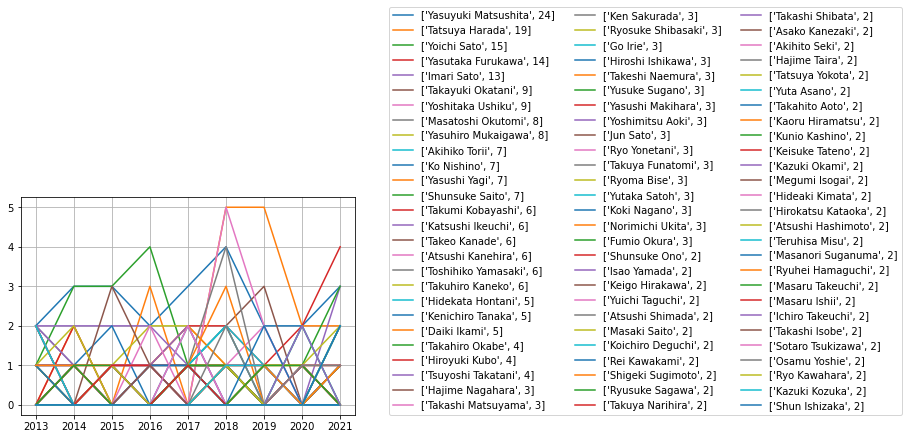

In [4]:
import re
import matplotlib.pylab as plt

# configurations
yearFrom=2013
yearTo=2022
toshow=1

# Regular expressions for Japanese-like and non-Japanese 
sjppat="\
^\
([AIUEO]|[BGKMNR][aiueo]|[BGKMNR]y[auo]|D[aeo]|S[aueo]|Sh[iu]|T[aeo]|Tsu|Z[aueo]|Y[auo]|H[aieo]|J[aiuo]|Ch[aiuo]|D[aeo]|Wa|Fu)\
([nht]|[aiueo]|[bgkmnr][aiueo]|[bgkmnr]y[auo]|d[aeo]|s[aueo]|sh[iu]|t[aeo]|tsu|z[aueo]|y[auo]|h[aieo]|j[aiuo]|ch[aiuo]|d[aeo]|wa|fu)*?\
\s\
([AIUEO]|[BGKMNR][aiueo]|D[aeo]|S[aueo]|Sh[iu]|T[aeo]|Tsu|Z[aueo]|Y[auo]|H[aieo]|J[aiuo]|Ch[aiuo]|D[aeo]|Wa|Fu)\
([nht]|[aiueo]|[bgkmnr][aiueo]|d[aeo]|s[aueo]|sh[iu]|t[aeo]|tsu|z[aueo]|y[auo]|h[aieo]|j[aiuo]|ch[aiuo]|d[aeo]|wa|fu)*?\
$\
"
snjppat="\
^(.+?an\s.+?an)$|^Yu\sYu$|^He|He$|^Han|Han$|^Sun|Sun$|^Ji|Ji$|^Jia|Jia$|^Su|Su$|^Guo|Guo$|^Zou|Zou$|^Yuan|Yuan$|\
^Dai\s|\sDai$|^Ma\s|\sMa$|^Na\s|\sNa$|^Yan\s|\sYan$|^Bai\s|\sBai$|^Tan\s|\sTan$|^Gan\s|\sGan$|^Yan\s|\sYan$|^Tao\s|\sTao$|^Ren\s|\sRen$|\
^Yuan\s|\sYuan$|^Hen\s|\sHen$|^Cho\s|\sCho$|^Ji\s|\sJi$|^Jia\s|\sJia$^Ge\s|\sGe$|^Gao\s|\sGao$|^Hao\s|\sHao$|^Choi\s|\sChoi$|^Ke\s|\sKe$|\
^Zuo\s|\sZuo$|^Bo\s|\sBo$|^Du\s|\sDu$|^Ni\s|\sNi$|^Bi\s|\sBi$|^Wan\s|\sWan$|^Heo\s|\sHeo$|^Jason\s|\sJason$|^Shi\s|\sShi$|^Des|\sDes|\
^Yuhe\s|\sYuhe$|^Fu\s|\sFu$|^Yao\s|\sYao$|^Mao\s|\sMao$|^Ryan\s|\sRyan$|^Niu\s|\sNiu$|^Gu\s|\sGu$|^Mo\s|\sMo$|\sYu$|^Mu\s|\sMu$|^Nie\s|\sNie$\
|^Sui\s|\sSui$|^Chan\s|\sChan$|^Guan\s|\sGuan$|^Yun\s|\sYun$|^Bin\s|\sBin$|^Jan\s|\sJan$\
|jie|iao|ia|oo|ee|chao|toni|gudo|aen|au|Zeku|zeku|rara|Minji|minji|nru|oha|Gurari|wane|hao|Dakai|Inkyu|Dae|Bei|Ahn|Kenneth|Amit\
|Meina|Minh|hui|Zabih|Bodo|Konu|Jane|Noh|Man|^Ori\s|You$|Gui|Yue|Joe|Matt|Menon|Suin|Munro|Watson|zadeh|\sHou|Shujon|Aron|Naza|Minkyo\
|Doron|Jain|Garon|Suh|Rahtu|Junho|Bera|Sachin|Moin|Samitha|Mukundan|Jayasekara|Samitha|Sanath|Basu|yuan|Ou$|Nirat|Jonathan|Bao|Yani\
|Juge|Jose|Mike|Jae|Juan|gege|Emonet|dana|Niket|Oneata|Shuchin"
dlm=",\s"

# main program
total, nonjp, jppaper = [], [], []
hist={}
for year in range(yearFrom,yearTo):
    fname='./CVPR'+str(year)+'_full_author_list'
    f = open(fname, 'r')
    lLines = f.read().splitlines()
    f.close()

    ncount=0
    title, authors, jptitle, jpauthors, nonjptitle, nonjpauthors = [], [], [], [], [], []
    for line in lLines:
        ndet=ncount%3
        if ndet==0:
            title.append(line)
        elif ndet==1:
            authors.append(line)
            authorList=re.split(dlm,line)
            bMatch=0
            for author in authorList:
                rmat=re.search(sjppat,author)
                rstop=re.search(snjppat,author)
                if rmat: # Japanese-like list
                    if not rstop: # Non-Japanese name filtering
                        # make individual statistics
                        if author in hist.keys():
                            if str(year) in hist[author]:
                                hist[author][str(year)]+=1
                            else:
                                hist[author][str(year)]=1
                        else:
                            hist[author]={str(year):1}
                        bMatch=1
            if bMatch==1:
                # make title, author list
                jptitle.append(title[-1])
                jpauthors.append(line)
            else:
                # make non-japanese title, author list (no use, just for check)
                nonjptitle.append(title[-1])
                nonjpauthors.append(line)
        ncount+=1
    # global statistics
    total.append(len(authors))
    nonjp.append(len(nonjpauthors))
    jppaper.append(len(jpauthors))

# dictionary to list conversion with sorting by year
sumhist, detail = [], []
for author in hist.keys():
    for year in range(yearFrom,yearTo):
        sYear=str(year)
        if sYear not in hist[author].keys():
            hist[author][sYear]=0
    myList = sorted(hist[author].items(), key=lambda x:x[0])
    x, y = zip(*myList)
    sumhist.append(sum(y))
    detail.append([author,sum(y),y])

# sorting by total number of publications
indices = [*range(len(sumhist))]
sorted_indices = sorted(indices, key=lambda i:-sumhist[i])
sumhist = [sumhist[i] for i in sorted_indices]
detail = [detail[i] for i in sorted_indices]

# filtering of the list to plot
show_indices=[]
for i in range(0,len(sumhist)):
    if sumhist[i] > toshow:
        show_indices.append(i)

# output and plot of the results
print([detail[i] for i in show_indices])
fig = plt.figure()
for i in show_indices:
    plt.plot(x, detail[i][2],label=detail[i][0:2])
plt.grid()
plt.legend(loc=(1.1, 0),ncol=3)
fig.savefig("test.png")
plt.show()